In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF


import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [2]:
def True_function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

In [3]:
def generate_function(data, obs):
    print('------------12 original data-----------')
    data = np.array(data)
    # for one feature dataset
    data_matrix = np.array(data[:,0]).reshape(-1, 1)

    Measured_response = np.zeros(len(data_matrix))
    for i in range(obs):
        Measured_response += np.array(data[:,i+1])
    # for one feature dataset
    Measured_response = Measured_response/obs
    
    Measured_std = []
    for j in range(len(data_matrix)):
        std = np.std(np.array(data[j,1:1+obs]))
        Measured_std.append(std)
    Measured_std = np.array(Measured_std)  
    print('evaluated mean of y :', Measured_response)
    print('evaluated std of y :', Measured_std)
    print('---------------------------------------\n')
    return data_matrix,Measured_response,Measured_std

## design virtual samples

In [4]:
virtual_samples = np.linspace(0,11,100)

## define a callable Kriging model and sampling function

In [5]:
def Sam_function(X,real_std,obs):
    print('--------------Draw samples-------------')
    print('real std of added datum:', real_std)
    X = np.array(X)
    Y = np.zeros(1)
    Y_list = []
    for i in range(obs):
        __sam = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=real_std, size=None)
        Y_list.append(__sam)
        Y += __sam
        print(i+1,'-th sampling, result = ', __sam)
    cal_std = np.std(np.array(Y_list))
    print('evaluated mean of added datum:', Y/obs)
    print('evaluated std of added datum:', cal_std)
    print('---------------------------------------\n')
    return Y/obs, np.array(cal_std)


## instantiate Bgolearn

In [6]:
Bgolearn = BGOS.Bgolearn()
method_name = 'PoI'


------------12 original data-----------
evaluated mean of y : [6.21494888 5.56581958 4.61988109 4.34056442 4.35646479 4.67190767
 4.62173112 4.55605355 4.70138419 4.48867457 5.8769712  7.75473896]
evaluated std of y : [0.30008321 0.2742029  0.07394358 0.91538122 0.33136727 0.29720623
 0.07801782 0.48293232 0.24548787 0.12272781 0.21645983 0.25832216]
---------------------------------------

current optimal is : 4.340564424
The next datum recomended by Probability of Improvement  : 
 x =  [8.77777778]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.1872620168553194
2 -th sampling, result =  4.578611054236859
3 -th sampling, result =  5.093244117540232
evaluated mean of added datum: [4.2863724]
evaluated std of added datum: 0.8050857167475898
---------------------------------------

1-th iteration 
 new added datum: [8.8, array([4.2864])]


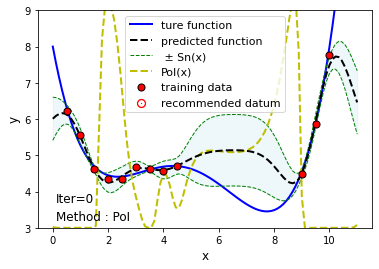

current optimal is : 4.2864
The next datum recomended by Probability of Improvement  : 
 x =  [8.66666667]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.5853412550645762
2 -th sampling, result =  3.959678435289056
3 -th sampling, result =  4.1345865160791755
evaluated mean of added datum: [3.89320207]
evaluated std of added datum: 0.2291024802162398
---------------------------------------

2-th iteration 
 new added datum: [8.7, array([3.8932])]


<Figure size 432x288 with 0 Axes>

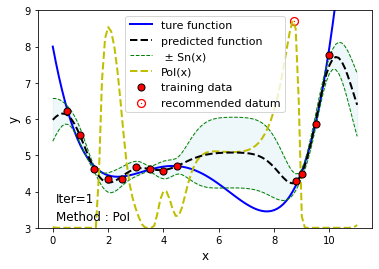

current optimal is : 3.8932
The next datum recomended by Probability of Improvement  : 
 x =  [8.44444444]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.173604817557907
2 -th sampling, result =  3.6354489676435784
3 -th sampling, result =  3.457804744282254
evaluated mean of added datum: [3.42228618]
evaluated std of added datum: 0.19021247984881678
---------------------------------------

3-th iteration 
 new added datum: [8.4, array([3.4223])]


<Figure size 432x288 with 0 Axes>

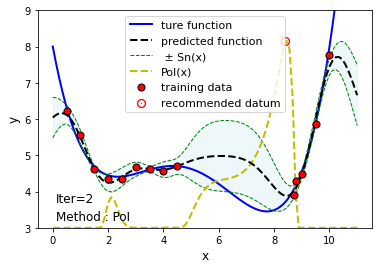

current optimal is : 3.4223
The next datum recomended by Probability of Improvement  : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  2.6317412811253225
2 -th sampling, result =  4.121125885941798
3 -th sampling, result =  3.846951002476284
evaluated mean of added datum: [3.53327272]
evaluated std of added datum: 0.6472311140245842
---------------------------------------

4-th iteration 
 new added datum: [8.2, array([3.5333])]


<Figure size 432x288 with 0 Axes>

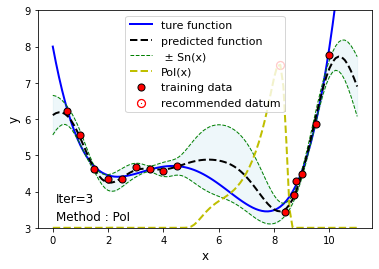

current optimal is : 3.4223
The next datum recomended by Probability of Improvement  : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.945563937554463
2 -th sampling, result =  4.529723732861727
3 -th sampling, result =  3.5651885927631835
evaluated mean of added datum: [4.01349209]
evaluated std of added datum: 0.39668852963046536
---------------------------------------

5-th iteration 
 new added datum: [8.2, array([4.0135])]


<Figure size 432x288 with 0 Axes>

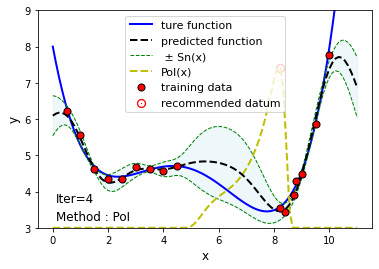

current optimal is : 3.4223
The next datum recomended by Probability of Improvement  : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  2.1755146259199254
2 -th sampling, result =  3.748601575538345
3 -th sampling, result =  3.8693460835808633
evaluated mean of added datum: [3.26448743]
evaluated std of added datum: 0.7715962382723227
---------------------------------------

6-th iteration 
 new added datum: [8.1, array([3.2645])]


<Figure size 432x288 with 0 Axes>

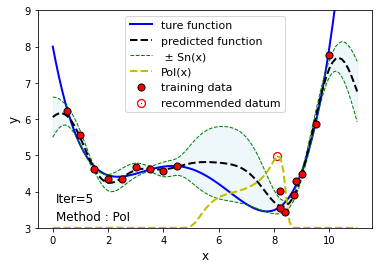

current optimal is : 3.2645
The next datum recomended by Probability of Improvement  : 
 x =  [7.77777778]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.2829589920999305
2 -th sampling, result =  3.7543545524861845
3 -th sampling, result =  3.399980513168997
evaluated mean of added datum: [3.47909802]
evaluated std of added datum: 0.20041312068579412
---------------------------------------

7-th iteration 
 new added datum: [7.8, array([3.4791])]


<Figure size 432x288 with 0 Axes>

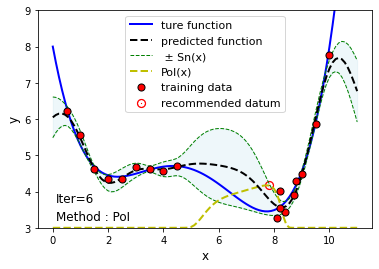

<Figure size 432x288 with 0 Axes>

In [8]:
obs = 3

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = Measured_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PoI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))

    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-obs_{obstime}-{num}.png'.format(name = method_name,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break

------------12 original data-----------
evaluated mean of y : [6.29185161 5.39856881 4.62623151 4.38385368 4.46148423 4.63694734
 4.5905237  4.59016103 4.67177078 4.4811777  5.95522378 7.80150911]
evaluated std of y : [0.29202661 0.37457828 0.06497479 0.79628133 0.33976528 0.26441507
 0.08652626 0.42238334 0.21869861 0.10707566 0.23132562 0.23792876]
---------------------------------------

current optimal is : 4.383853676
The next datum recomended by Probability of Improvement  : 
 x =  [8.77777778]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  4.019138605431722
2 -th sampling, result =  4.228842899544457
3 -th sampling, result =  4.19651552811361
4 -th sampling, result =  4.267684437618568
evaluated mean of added datum: [4.17804537]
evaluated std of added datum: 0.09514207536317192
---------------------------------------

1-th iteration 
 new added datum: [8.8, array([4.178])]


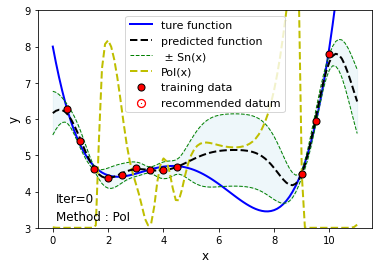

current optimal is : 4.178
The next datum recomended by Probability of Improvement  : 
 x =  [8.66666667]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  4.203796929898614
2 -th sampling, result =  3.544334633876532
3 -th sampling, result =  4.532679005556149
4 -th sampling, result =  2.827851097605853
evaluated mean of added datum: [3.77716542]
evaluated std of added datum: 0.6534950422282885
---------------------------------------

2-th iteration 
 new added datum: [8.7, array([3.7772])]


<Figure size 432x288 with 0 Axes>

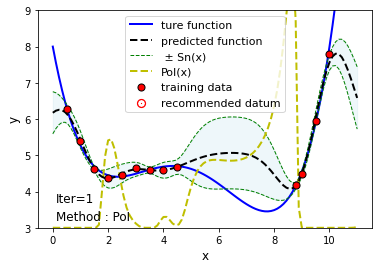

current optimal is : 3.7772
The next datum recomended by Probability of Improvement  : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.0979234134570404
2 -th sampling, result =  3.551226053010564
3 -th sampling, result =  3.7245825299893838
4 -th sampling, result =  3.5098151495727747
evaluated mean of added datum: [3.47088679]
evaluated std of added datum: 0.22990923377019587
---------------------------------------

3-th iteration 
 new added datum: [8.2, array([3.4709])]


<Figure size 432x288 with 0 Axes>

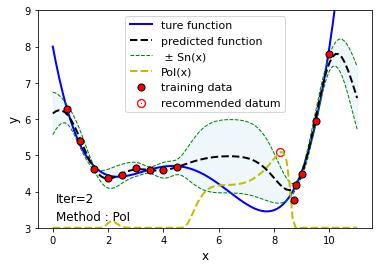

current optimal is : 3.4709
The next datum recomended by Probability of Improvement  : 
 x =  [8.]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.3493985207881027
2 -th sampling, result =  3.543023790332168
3 -th sampling, result =  3.279328543716552
4 -th sampling, result =  3.48278458067513
evaluated mean of added datum: [3.41363386]
evaluated std of added datum: 0.10450798178478722
---------------------------------------

4-th iteration 
 new added datum: [8.0, array([3.4136])]


<Figure size 432x288 with 0 Axes>

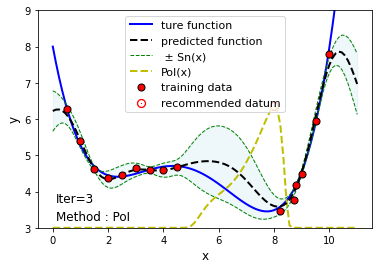

current optimal is : 3.4136
The next datum recomended by Probability of Improvement  : 
 x =  [7.88888889]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.2624862882953973
2 -th sampling, result =  3.746127771981322
3 -th sampling, result =  3.7595274152720015
4 -th sampling, result =  4.079356415053047
evaluated mean of added datum: [3.71187447]
evaluated std of added datum: 0.2917348152369972
---------------------------------------

5-th iteration 
 new added datum: [7.9, array([3.7119])]


<Figure size 432x288 with 0 Axes>

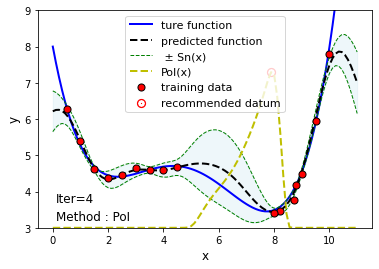

current optimal is : 3.4136
The next datum recomended by Probability of Improvement  : 
 x =  [8.]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.3309579628672927
2 -th sampling, result =  2.7496479104366336
3 -th sampling, result =  3.6052955441657693
4 -th sampling, result =  5.189672014139852
evaluated mean of added datum: [3.71889336]
evaluated std of added datum: 0.9036073438008825
---------------------------------------

6-th iteration 
 new added datum: [8.0, array([3.7189])]


<Figure size 432x288 with 0 Axes>

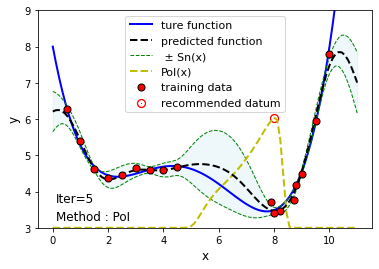

current optimal is : 3.4136
The next datum recomended by Probability of Improvement  : 
 x =  [8.]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  3.1464592977416475
2 -th sampling, result =  2.7706856553292045
3 -th sampling, result =  3.98244970806471
4 -th sampling, result =  2.753167645620768
evaluated mean of added datum: [3.16319058]
evaluated std of added datum: 0.4984085616567848
---------------------------------------

7-th iteration 
 new added datum: [8.0, array([3.1632])]


<Figure size 432x288 with 0 Axes>

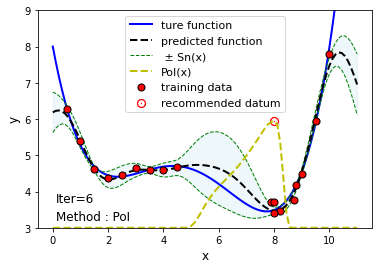

current optimal is : 3.1632
The next datum recomended by Probability of Improvement  : 
 x =  [7.11111111]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.424204372366482
2 -th sampling, result =  3.343895917270025
3 -th sampling, result =  3.2081691410529163
4 -th sampling, result =  2.9548258132470404
evaluated mean of added datum: [3.23277381]
evaluated std of added datum: 0.17808302948699056
---------------------------------------

8-th iteration 
 new added datum: [7.1, array([3.2328])]


<Figure size 432x288 with 0 Axes>

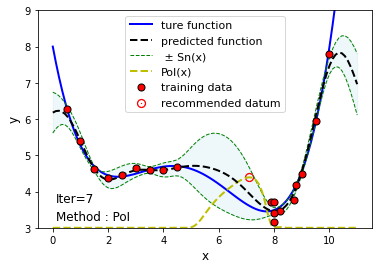

current optimal is : 3.1632
The next datum recomended by Probability of Improvement  : 
 x =  [6.88888889]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.4113465983476203
2 -th sampling, result =  3.5672989617816357
3 -th sampling, result =  3.520954177290381
4 -th sampling, result =  3.5277183227879823
evaluated mean of added datum: [3.50682952]
evaluated std of added datum: 0.05789945971713153
---------------------------------------

9-th iteration 
 new added datum: [6.9, array([3.5068])]


<Figure size 432x288 with 0 Axes>

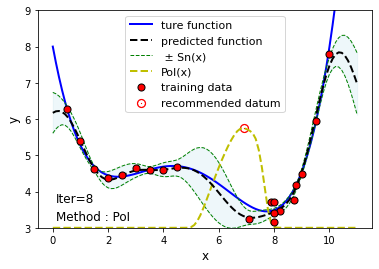

current optimal is : 3.1632
The next datum recomended by Probability of Improvement  : 
 x =  [7.44444444]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.6221133204744764
2 -th sampling, result =  3.533075511389865
3 -th sampling, result =  3.4849032841027143
4 -th sampling, result =  3.120138205542108
evaluated mean of added datum: [3.44005758]
evaluated std of added datum: 0.19115188432876917
---------------------------------------

10-th iteration 
 new added datum: [7.4, array([3.4401])]


<Figure size 432x288 with 0 Axes>

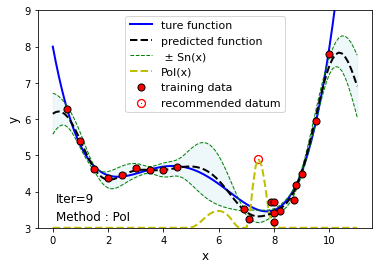

current optimal is : 3.1632
The next datum recomended by Probability of Improvement  : 
 x =  [7.44444444]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.438180853953955
2 -th sampling, result =  3.258069646547089
3 -th sampling, result =  3.2647425376241586
4 -th sampling, result =  3.625398678304759
evaluated mean of added datum: [3.39659793]
evaluated std of added datum: 0.15054472076792938
---------------------------------------

11-th iteration 
 new added datum: [7.4, array([3.3966])]


<Figure size 432x288 with 0 Axes>

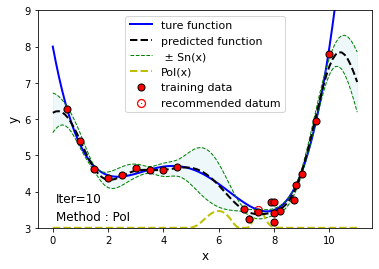

Searching is defeated


<Figure size 432x288 with 0 Axes>

In [9]:
obs = 4

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = Measured_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PoI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))

    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-obs_{obstime}-{num}.png'.format(name = method_name,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Probability of Improvement  : 
 x =  [8.77777778]
--------------Draw samples-------------
real std of added datum: 0.1
1 -th sampling, result =  4.128314144417126
2 -th sampling, result =  4.152355603406506
3 -th sampling, result =  4.182022618554089
4 -th sampling, result =  4.19099840277338
5 -th sampling, result =  4.235218004569742
evaluated mean of added datum: [4.17778175]
evaluated std of added datum: 0.036290828451061456
---------------------------------------

1-th iteration 
 new added datum: [8.8, array([4.1778])]


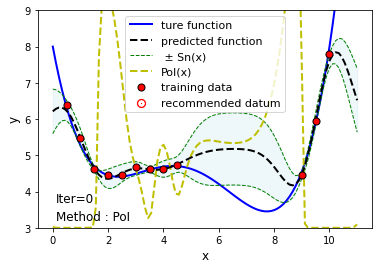

current optimal is : 4.1778
The next datum recomended by Probability of Improvement  : 
 x =  [8.66666667]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  4.340603947338415
2 -th sampling, result =  3.3265303599314007
3 -th sampling, result =  3.658532461244638
4 -th sampling, result =  4.627651814924113
5 -th sampling, result =  3.5432831985459288
evaluated mean of added datum: [3.89932036]
evaluated std of added datum: 0.4975997526904563
---------------------------------------

2-th iteration 
 new added datum: [8.7, array([3.8993])]


<Figure size 432x288 with 0 Axes>

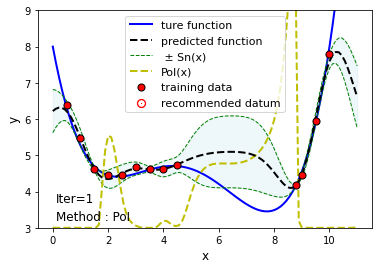

current optimal is : 3.8993
The next datum recomended by Probability of Improvement  : 
 x =  [8.33333333]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.564984065513534
2 -th sampling, result =  3.5677608374853857
3 -th sampling, result =  3.7393455653534784
4 -th sampling, result =  3.6909102577397466
5 -th sampling, result =  3.745027784260732
evaluated mean of added datum: [3.6616057]
evaluated std of added datum: 0.08000510781584733
---------------------------------------

3-th iteration 
 new added datum: [8.3, array([3.6616])]


<Figure size 432x288 with 0 Axes>

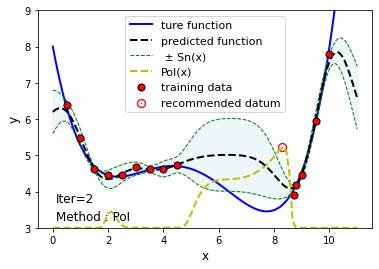

current optimal is : 3.6616
The next datum recomended by Probability of Improvement  : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.665528645175964
2 -th sampling, result =  3.8764055119931284
3 -th sampling, result =  3.45816536665507
4 -th sampling, result =  3.387025577820302
5 -th sampling, result =  3.1848372160650795
evaluated mean of added datum: [3.51439246]
evaluated std of added datum: 0.23743886109486131
---------------------------------------

4-th iteration 
 new added datum: [8.1, array([3.5144])]


<Figure size 432x288 with 0 Axes>

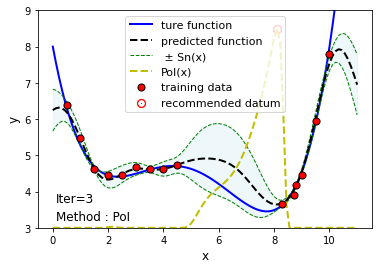

current optimal is : 3.5144
The next datum recomended by Probability of Improvement  : 
 x =  [7.77777778]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  2.976523752219259
2 -th sampling, result =  4.041002897399647
3 -th sampling, result =  2.329656005965653
4 -th sampling, result =  2.9862355440284234
5 -th sampling, result =  2.964091166206233
evaluated mean of added datum: [3.05950187]
evaluated std of added datum: 0.5508857916092653
---------------------------------------

5-th iteration 
 new added datum: [7.8, array([3.0595])]


<Figure size 432x288 with 0 Axes>

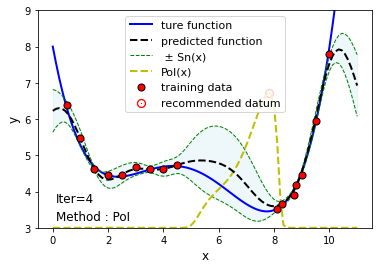

<Figure size 432x288 with 0 Axes>

In [19]:
obs = 5

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = Measured_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PoI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))

    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-obs_{obstime}-{num}.png'.format(name = method_name,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break